# Edgeworth Box: Efficiency in production allocation

## Efficiency in production

Consider a small-open economy with two production sectors -- agriculture and manufacturing -- with production in each sector taking place with constant returns to scale production functions.  Producers in the agricultural sector maximize profits

$$\max_{K_A,L_A} p_A F(K_A,L_A) - w L_A - r K_A$$

And producers in manufacturing similarly maximize

$$\max_{K_M,L_M} p_M G(K_M,L_M) - w L_M - r K_M$$

In equilibrium total factor demands must equal total supplies:

$$K_A + K_M = \bar K$$

$$L_A + L_M = \bar L$$ 

The first order necessary conditions for an interior optimum in each sector lead to an equilibrium where the following condition must hold:

$$\frac{F_L(K_A,L_A)}{F_K(K_A,L_A)} = \frac{w}{r} 
       =\frac{G_L(\bar K-K_A,\bar L- L_A)}{F_K(\bar K-K_A,\bar L- L_A)} $$

Efficiency requires that the marginal rates of technical substitutions (MRTS) be equalized across sectors (and across firms within a sector which is being assumed here). In an Edgeworth box, isoquants from each sector will be tanget to a common wage-rental ratio line.  

If we assume Cobb-Douglas forms $F(K,L) = K^\alpha L^{1-\alpha}$ and $G(K,L) = K^\beta L^{1-\beta}$ the efficiency condition can be used to find a closed form solution for $K_A$ in terms of $L_A$:

$$\frac{(1-\alpha)}{\alpha}\frac{K_A}{L_A} =\frac{w}{r} =\frac{(1-\beta)}{\beta}\frac{\bar K-K_A}{\bar L-L_A}$$

Rearranging the expression above we can get a closed-form expression for the efficiency locus $K_A (L_A)$:

$$K_A(L_A) = \frac{L_A \cdot \bar K}
{ \frac{\beta(1-\alpha)}{\alpha (1-\beta)} (\bar L -L_A)+L_A}$$

With this we can now plot the *efficiency locus* curve in an Edgeworth box.

## Edgeworth Box plots

Click on the + to reveal the python code for the plots below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

In [2]:
ALPHA = 0.6   # capital share in agriculture
BETA = 0.4   # 

KBAR = 100
LBAR = 100

p = 1      # =Pa/Pm  relative price of ag goods

def F(K,L,alpha=ALPHA):
    """Agriculture Production function"""
    return (K**alpha)*(L**(1-alpha))

def G(K,L,beta=BETA):
    """Manufacturing Production function"""
    return (K**beta)*(L**(1-beta))

def budgetc(c1, p1, p2, I):
    return (I/p2)-(p1/p2)*c1

def isoq(L, Q, mu):
    return (Q/(L**(1-mu)))**(1/mu)

In [3]:
def edgeworth(L, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA, beta=BETA):
    """efficiency locus: """
    a = (1-alpha)/alpha
    b = (1-beta)/beta
    return b*L*Kbar/(a*(Lbar-L)+b*L)

def edgeplot(LA, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
    """Draw an edgeworth box
    
    arguments:
    LA -- labor allocated to ag, from which calculate QA(Ka(La),La) 
    """
    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F(KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    print("(LA,KA)=({:4.1f}, {:4.1f})  (QA, QM)=({:4.1f}, {:4.1f})  RTS={:4.1f}"
          .format(LA,KA,QA,QM,RTS))
    La = np.arange(1,Lbar)
    fig, ax = plt.subplots(figsize=(7,6))
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(La, edgeworth(La,Kbar,Lbar,alpha,beta),'k-')
    #ax.plot(La, La,'k--')
    ax.plot(La, isoq(La, QA, alpha))
    ax.plot(La, Kbar-isoq(Lbar-La, QM, beta),'g-')
    ax.plot(LA, KA,'ob')
    ax.vlines(LA,0,KA, linestyles="dashed")
    ax.hlines(KA,0,LA, linestyles="dashed")
    ax.text(-6,-6,r'$O_A$',fontsize=16)
    ax.text(Lbar,Kbar,r'$O_M$',fontsize=16)
    ax.set_xlabel(r'$L_A -- Labor$', fontsize=16)
    ax.set_ylabel('$K_A - Capital$', fontsize=16)
    #plt.show()

In [4]:
def ppf(LA,Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
    """Draw a production possibility frontier
    
    arguments:
    LA -- labor allocated to ag, from which calculate QA(Ka(La),La) 
    """
    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F( KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    ax.scatter(QA,QM)
    La = np.arange(0,Lbar)
    Ka = edgeworth(La, Kbar, Lbar,alpha, beta)
    Qa = F(Ka,La,alpha)
    Qm = G(Kbar-Ka,Lbar-La,beta)
    ax.set_xlim(0, 2*LBAR)
    ax.set_ylim(0, Kbar)
    ax.plot(Qa, Qm,'k-')
    ax.set_xlabel(r'$Q_A$',fontsize=18)
    ax.set_ylabel(r'$Q_B$',fontsize=18)
    plt.show()

Here is and Edgeworth Box depicting the situation where $L_A = 50$ units of labor are allocated to the agricultural sector and all other allocations are efficient (along the efficiency locus).

(LA,KA)=(50.0, 69.2)  (QA, QM)=(60.8, 41.2)  RTS= 2.1


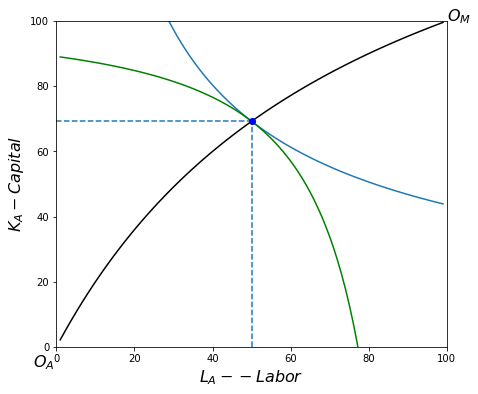

In [5]:
edgeplot(50)

If you're reading this using a jupyter server you can interact with the following plot, changing the technology parameters and position of the isoquant. If you are not this may appear blank or static.

In [6]:
LA = 50
interact(edgeplot, LA=(10, LBAR-10,1), 
         Kbar=fixed(KBAR), Lbar=(LBAR, 2*LBAR, 1),
         alpha=(0.1,0.9,0.1),beta=(0.1,0.9,0.1));

interactive(children=(IntSlider(value=50, description='LA', max=90, min=10), IntSlider(value=100, description=…

### The Production Possiblity Frontier

The **efficiency locus** also allows us to trace out the production possibility frontier: by varying $L_A$ from 0 to $\bar L$ and, for every $L_A$, calculating $K_A(L_A)$ and with that efficient production $(q_A,q_B)$ where $q_A=F(K_A(L_A), L_A)$ and $q_B=F(\bar K - K_A(L_A), \bar L - L_A)$. 

For Cobb-Douglas technologies the PPF will be quite straight unless $\beta$ and $\alpha$ are very different from each other.

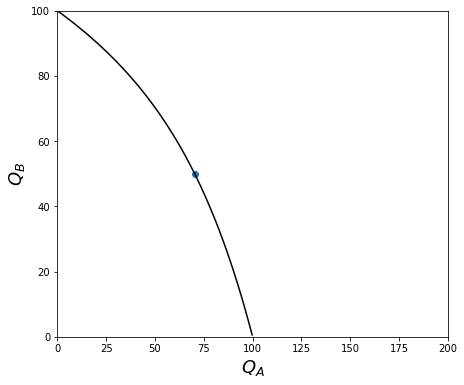

In [7]:
fig, ax = plt.subplots(figsize=(7,6))
ppf(30,alpha =0.8, beta=0.2)

## Efficient resource allocation and comparative advantage in a small open economy

We have a production possibility frontier which also tells us the opportunity cost of producing different amounts of good $A$ in terms of how much of good B (via its slope or the Rate of Product Transformation (RPT) $\frac{MC_A}{MC_B}$). This is given by the slope of the PPF. The bowed out shape of the PPF tells us that the opportunity cost of producing either good is rising in its quantity. 

How much of each good will the economy produce?   If this is a competitive small open economy then product prices will be given by world prices. Each firm maximizes profits which leads every firm in the A sector to increase output until $MC_X(q_a) = P_A$ and similarly in the B sector so that in equlibrium we must have 

$$\frac{MC_A}{MC_B} = \frac{P_A}{P_B}$$

and the economy will produce where the slope of the PPF exactly equals the world relative price.  This is where national income valued at world prices is maximized, and the country is producing according to comparative advantage.

Consumers take this income as given and maximize utility.  If we make heroic assumptions about preferences (preferences are identical and homothetic) then we can represent consumer preferences on the same diagram and we would have consumers choosing a consumption basket somewhere along the *consumption possibliity frontier* given by the world price line passing thorugh the production point. 

If the economy is instead assumed to be closed then product prices must be calculated alongside the resource allocation. The PPF itself becomes the economy's budget constraint and we find an optimum (and equlibrium autarky domestic prices) where the community indifference curve is tangent to the PPF.

As previously noted, given our linear homogenous production technology, profit maximization in agriculture will lead firms to choose inputs to satisfy $\frac{(1-\alpha)}{\alpha}\frac{K_A}{L_A} =\frac{w}{r}$. This implies a relationship between the optimal production technique or capital-labor intensity $\frac{K_A}{L_A}$ in agriculture and the factor price ratio $\frac{w}{r}$:

$$  \frac{K_A}{L_A} = \frac{\alpha}{1-\alpha} \frac{w}{r} $$

and similarly in manufacturing

$$  \frac{K_M}{L_M} = \frac{\beta}{1-\beta} \frac{w}{r} $$

From the first order conditions we also have:

$$P_A F_L(K_A,L_A) = w = P_M G_L(K_M,L_M) $$

Note this condition states that competition has driven firms to price at marginal cost in each industry or $P_A = MC_A = w\frac{1}{F_L}$ and $P_M = MC_M = w\frac{1}{G_L}$ which in turn implies that at a market equilibrium optimum 

$$\frac{P_A}{P_M} = \frac{G_L(K_M,L_M)}{F_L(K_A,L_A)}$$

This states that the world price line with slope (negative) $\frac{P_A}{P_M}$ will be tangent to the production possibility frontier which as a slope (negative) $\frac{MC_A}{MC_M}= \frac{P_A}{P_M}$ which can also be written as $\frac{G_L}{F_L}$ or equivalently $\frac{G_K}{F_K}$. The competitive market leads producers to move resources across sectors to maximize the value of GDP at world prices. 

With the Cobb Douglas technology we can write:

$$F_L = (1-\alpha) \left [ \frac{K_A}{L_A} \right]^\alpha$$

$$G_L = (1-\beta) \left [ \frac{K_M}{L_M} \right]^\beta$$

Using these expressions and the earlier expression relating $\frac{K_A}{L_A}$ and $\frac{K_M}{L_M}$ to $\frac{w}{r}$ we have:

$$\frac{P_A}{P_M} 
=\frac{1-\alpha}{1-\beta} 
    \frac{\left [ \frac{ (1-\beta)}{\beta} \frac{w}{r} \right]^\beta} 
    { \left [ \frac{ (1-\alpha)}{\alpha} \frac{w}{r} \right]^\alpha}
$$

or 

$$\frac{P_A}{P_M} = \Gamma \left [ \frac{w}{r}  \right]^{\beta - \alpha}
$$
where

$$\Gamma =
\frac{1-\alpha}{1-\beta} 
\left ( \frac{\alpha}{1-\alpha} \right )^\alpha 
\left ( \frac{1-\beta}{\beta} \right )^\beta 
$$

Solving for $\frac{w}{r}$ as a function of the world prices we find an expression for the 'Stolper-Samuelson' (SS) line:

$$\frac{w}{r} = \frac{1}{\Gamma} \left [  \frac{P_A}{P_M}   \right ]^\frac{1}{\beta-\alpha} $$

### The Stolper Samuelson Theorem

The Stolper Samuelson theorem tells us how changes in the world relative price of products translates into changes in the relative price of factors and therefore in the distribution of income in society.

The theorem states that an increase in the relative price of a good will lead to an increase in both the relative and the real price of the factor used intensively in the production of that good (and conversely to a decline in both the real and the relative price of the other factor).

In [ ]:
def wreq(p,a=ALPHA, b=BETA):
    B = ((1-a)/(1-b))*(a/(1-a))**a  * ((1-b)/b)**b
    return B*p

In [ ]:
def ssline(a=ALPHA, b=BETA):
    p = np.linspace(0.1,10,100)
    plt.title('The Stolper-Samuelson line')
    plt.xlabel(r'$p = \frac{P_a}{P_m}$', fontsize=18)
    plt.ylabel(r'$ \frac{w}{r}$', fontsize=18)
    plt.plot(p,wreq(p, a, b));

In [ ]:
ssline(a=0.6, b=0.3);

This relationship can be seen from the formula.  If agriculture were more labor intensive than manufacturing, so $\alpha < \beta$, then an increase in the relative price of agricultural goods creates an incipient excess demand for labor and an excess supply of capital (as firms try to expand production in the now more profitable labor-intensive agricultural sector and cut back production in the now relatively less profitable and capital-intensive manufacturing sector). Equilibrium will only be restored if the equilibrium wage-rental ratio falls which in turn leads firms in both sectors to adopt more capital-intensive techniques.  With more capital per worker in each sector output per worker and hence real wages per worker $\frac{w}{P_a}$ and $\frac{w}{P_m}$ increase.  

### Extensions to do

 * Code to solve for unique HOS equilibrium as a function of world relative price $\frac{P_A}{P_M}$
 * Interactive plot with $\frac{P_A}{P_M}$ slider that plots equilibrium in Edgeworth box and PPF
 

It's interesting to note that for Cobb-Douglas technologies you really need quite a difference in capital-intensities between the two technologies in order to get much curvature to the production function.